In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings("ignore")

### Step 1:
Preprocess the data. Selection/generation/ transformation of categorical variables, useful variables etc all your discretion.

In [78]:
#load the data
test = pd.read_csv('holdout_test.csv')
train = pd.read_csv('train.csv')

In [79]:
#drop columns that are not useful
train = train.drop(columns=['Ticket'])
test = test.drop(columns=['Ticket'])
train = train.drop(columns=['PassengerId'])

In [80]:
#make dummy variables
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [81]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


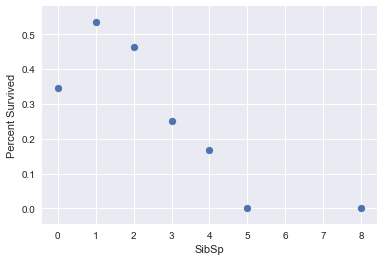

In [82]:
import matplotlib.pyplot as plt
df=train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
plt.scatter(df.SibSp,df.Survived)
plt.xlabel('SibSp')
plt.ylabel('Percent Survived')
plt.show()

In [83]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0,0.5,'Percent Survived')

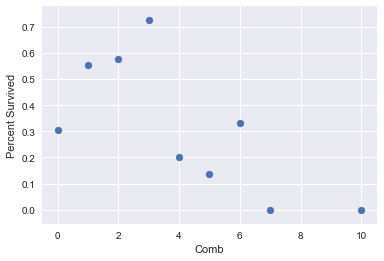

In [84]:
df = pd.DataFrame()
df['Combined'] = (train.Parch + train.SibSp)
df['Survived'] = train.Survived
df = df[["Combined", "Survived"]].groupby(['Combined'], as_index=False).mean()

plt.scatter(df.Combined,df.Survived)
plt.xlabel('Comb')
plt.ylabel('Percent Survived')

In [85]:
#filling in missing ages
Ages = pd.concat([train['Age'], test['Age']])
AveAge = Ages.mean()
StdAge = Ages.std()
NullAgeCount1 = train.Age.isnull().sum()
RandAges1 = np.random.randint(AveAge - StdAge, AveAge + StdAge, size=NullAgeCount1)
NullAgeCount2 = test.Age.isnull().sum()
RandAges2 = np.random.randint(AveAge - StdAge, AveAge + StdAge, size=NullAgeCount2)
train.Age[train.Age.isna()] = RandAges1
train.Age = train.Age.astype(int)
test.Age[test.Age.isna()] = RandAges2
test.Age = test.Age.astype(int)

Text(0,0.5,'Percent Survived')

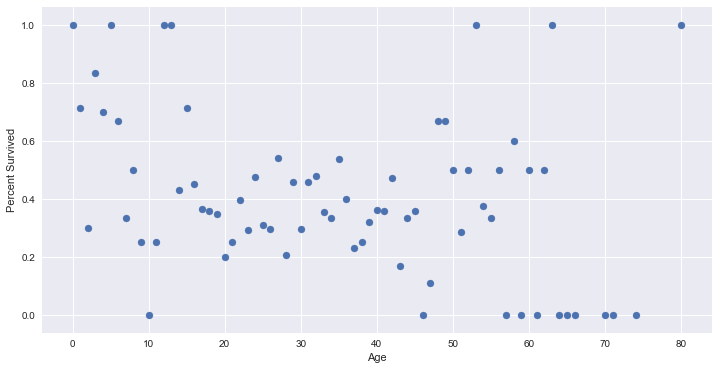

In [86]:
df=train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

plt.figure(figsize=(12,6))
plt.scatter(df.Age,df.Survived)
plt.xlabel('Age')
plt.ylabel('Percent Survived')

In [87]:
#filling in a missing fare
Fares = pd.concat([train['Fare'], test['Fare']])
test.Fare[test.Fare.isna()] = Fares.median()

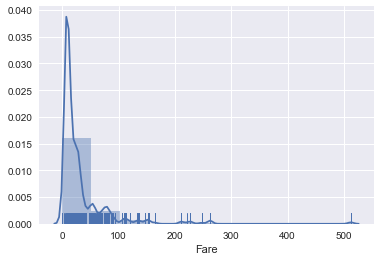

In [88]:
#looking at distribution of fare
ax = sns.distplot(train['Fare'], kde=True, rug=True, bins=10)

In [89]:
#log transformation of fare
train.Fare = train.Fare.map(lambda i: np.log(i) if i > 0 else 0)
test.Fare = test.Fare.map(lambda i: np.log(i) if i > 0 else 0)

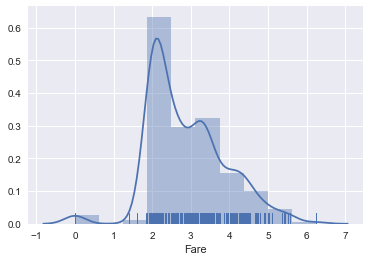

In [90]:
ax = sns.distplot(train['Fare'], kde=True, rug=True, bins=10)

Text(0,0.5,'Percent Survived')

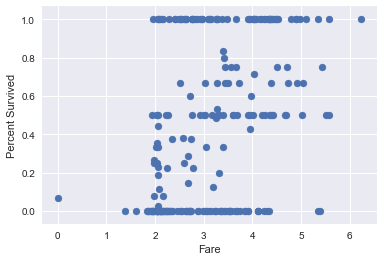

In [91]:
df = train[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)
plt.scatter(df.Fare,df.Survived)
plt.xlabel('Fare')
plt.ylabel('Percent Survived')

In [92]:
#filling missing embarked values to "S" which is the most common
train.Embarked[train.Embarked.isna()] = "S"

In [93]:
#make dummy variables
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 1} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 1} ).astype(int)
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.502041
0,0,0.339009


In [94]:
#first letter of cabin shows which deck the passenger was on

import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
train['Cabin'] = train['Cabin'].fillna("U0")
train['Deck'] = train['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
train['Deck'] = train['Deck'].map(deck)
train['Deck'] = train['Deck'].fillna(8)
train['Deck'] = train['Deck'].astype(int)

test['Cabin'] = test['Cabin'].fillna("U0")
test['Deck'] = test['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
test['Deck'] = test['Deck'].map(deck)
test['Deck'] = test['Deck'].fillna(8)
test['Deck'] = test['Deck'].astype(int) 

Text(0,0.5,'Percent Survived')

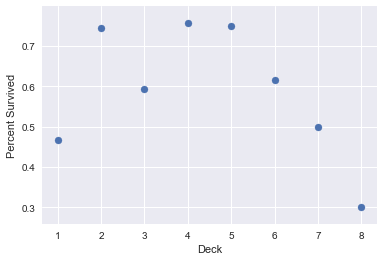

In [95]:
df = train[["Deck", "Survived"]].groupby(['Deck'], as_index=False).mean().sort_values(by='Survived', ascending=False)
plt.scatter(df.Deck,df.Survived)
plt.xlabel('Deck')
plt.ylabel('Percent Survived')

In [96]:
#did they have a cabin or not
train.Cabin[train.Deck == 8] = 0
train.Cabin[train.Deck < 8] = 1
train.Cabin = train.Cabin.astype(int)

test.Cabin[train.Deck == 8] = 0
test.Cabin[train.Deck < 8] = 1
test.Cabin = test.Cabin.astype(int)
train[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
1,1,0.669951
0,0,0.299419


In [97]:
#making them into categorical data
train.Pclass = train.Pclass.astype('category')
train.Sex = train.Sex.astype('category')
train.Cabin = train.Cabin.astype('category')
train.Embarked = train.Embarked.astype('category')

test.Pclass = test.Pclass.astype('category')
test.Sex = test.Sex.astype('category')
test.Cabin = test.Cabin.astype('category')
test.Embarked = test.Embarked.astype('category')

Text(0,0.5,'Percent Survived')

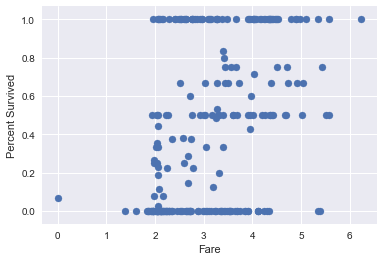

In [98]:
df = train[["Fare", "Survived"]]
df.Fare = round(test.Fare,1)
df = train[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean()
plt.scatter(df.Fare,df.Survived)
plt.xlabel('Fare')
plt.ylabel('Percent Survived')

In [99]:
train['Title'] = train.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test['Title'] = test.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [100]:
train[["Title", "Survived"]].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
16,the Countess,1.000000
9,Mlle,1.000000
15,Sir,1.000000
13,Ms,1.000000
5,Lady,1.000000
10,Mme,1.000000
12,Mrs,0.792000
8,Miss,0.697802
7,Master,0.575000
1,Col,0.500000


In [101]:
titles = {"Capt":0,"Jonkheer":0,"Rev":0,"Don":0,"Col":1,"Major":1,"Sir":2,"Dr":3,"the Countess":4,"Mme":4,"Mlle":4,"Dona":4,"Ms":4,"Lady":4,"Mr":5,"Mrs":6,"Miss":7,"Master":8}

train.Title = train.Title.map(titles)
train.Title = train.Title.astype('category')
test.Title = test.Title.map(titles)
test.Title = test.Title.astype('category')

In [102]:
dummy = train.drop('Name', axis = 1) #dropping Name since I haven't done anything with it yet
dummy.head()

# One-hot encode the data using pandas get_dummies
#traindummy = pd.get_dummies(traindummy)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck,Title
0,0,3,1,22,1,0,1.981001,0,0,8,5
1,1,1,0,38,1,0,4.266662,1,1,3,6
2,1,3,0,26,0,0,2.070022,0,0,8,7
3,1,1,0,35,1,0,3.972177,1,0,3,6
4,0,3,1,35,0,0,2.085672,0,0,8,5


### Step 2:
Build your models: Please build classification models in Python to predict the Survived binary status assigned to a passenger. When writing the code associated with each model, please have the first part produce and save the model, followed by a second part that loads and applies the model.

In [27]:
#make train and test
labels = np.array(dummy['Survived'])
features = dummy.drop('Survived', axis = 1)
rs = 100

from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = rs)

In [69]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=rs)
logreg.fit(train_features, train_labels)
pred1 = logreg.predict(test_features)
acc_log = round(logreg.score(test_features, test_labels) * 100, 2)
print('Accuracy:', acc_log, '%.')

Accuracy: 80.72 %.


In [29]:
# #Comparing different Support Vector Machines methods
# from sklearn import svm
# C = 1.0  # SVM regularization parameter
# svc = svm.SVC(kernel='linear', C=C,random_state=rs).fit(train_features, train_labels)
# rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C,random_state=rs).fit(train_features, train_labels)
# poly_svc = svm.SVC(kernel='poly', degree=3, C=C,random_state=rs).fit(train_features, train_labels)
# lin_svc = svm.LinearSVC(C=C,random_state=rs).fit(train_features, train_labels)

# print(round(svc.score(test_features, test_labels) * 100, 2))
# print(round(rbf_svc.score(test_features, test_labels) * 100, 2))
# print(round(poly_svc.score(test_features, test_labels) * 100, 2))
# print(round(lin_svc.score(test_features, test_labels) * 100, 2))

77.58
74.44
80.72
80.27


In [66]:
# #Polynomial Support Vector Classification
# from sklearn.svm import SVC
# svc = SVC(C=.8, kernel='poly',random_state=rs)
# #A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.
# #gamma defines how much influence a single training example has.
# #The larger gamma is, the closer other examples must be to be affected.
# svc.fit(train_features, train_labels)
# pred2 = svc.predict(test_features)
# acc_svc = round(svc.score(test_features, test_labels) * 100, 2)
# print('Accuracy:', acc_svc, '%.')

Accuracy: 80.72 %.


In [70]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=10, p=2, weights='uniform')
knn.fit(train_features, train_labels)
pred3 = knn.predict(test_features)
acc_knn = round(knn.score(test_features, test_labels) * 100, 2)
print('Accuracy:', acc_knn, '%.')

Accuracy: 76.68 %.


In [71]:
#Linear Model with Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=rs)
sgd.fit(train_features, train_labels)
pred4 = sgd.predict(test_features)
acc_sgd = round(sgd.score(test_features, test_labels) * 100, 2)
print('Accuracy:', acc_sgd, '%.')

Accuracy: 78.92 %.


In [72]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=rs)
decision_tree.fit(train_features, train_labels)
pred5 = decision_tree.predict(test_features)
acc_decision_tree = round(decision_tree.score(test_features, test_labels) * 100, 2)
print('Accuracy:', acc_decision_tree, '%.')

Accuracy: 80.27 %.


In [64]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=decision_tree, n_estimators=180, random_state=rs)
ada.fit(train_features, train_labels)
pred6 = ada.predict_proba(test_features)[:,1]
acc = sum(np.round(pred6,0).astype(int) == test_labels)/len(test_labels) *100
print('Accuracy:', round(acc, 2), '%.')

Accuracy: 76.23 %.


In [73]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=1000, random_state = rs)
random_forest.fit(train_features, train_labels)
pred7 = random_forest.predict(test_features)
acc_random_forest = round(random_forest.score(test_features, test_labels) * 100, 2)
print('Accuracy:', acc_random_forest, '%.')

Accuracy: 83.86 %.


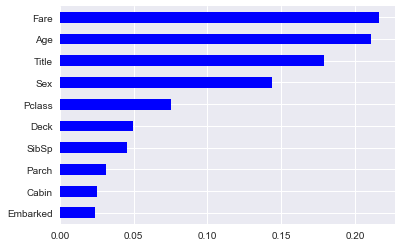

In [36]:
#Looking at the important features of Random Forest results
importances_rf = pd.Series(random_forest.feature_importances_,index = features.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

In [37]:
# #Voting Classifier
# classifiers = [('Logistic Regression', logreg), ('SVC', svc), ('Classification Tree', decision_tree),
#                ('Random Forest',random_forest), ('KNeighborsClassifier', knn), ('SGDClassifier', sgd)]

# from sklearn.ensemble import VotingClassifier
# from sklearn.metrics import accuracy_score
# vc = VotingClassifier(estimators=classifiers, voting='hard')     
# vc.fit(train_features, train_labels)  
# pred8 = vc.predict(test_features)
# accuracy = accuracy_score(test_labels, pred8)
# print('Hard Voting Classifier: {:.3f}'.format(accuracy*100))

Hard Voting Classifier: 83.408


/Users/anneitrheim/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [44]:
#Evaluating the models with the best accuracy using 10-fold cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LogisticRegression(random_state=rs), features, labels, scoring='accuracy', cv=10)
print('LogRegr', scores.mean())
# scores = cross_val_score(SVC(C=.8, kernel='poly',random_state=rs), features, labels, scoring='accuracy', cv=10)
# print('PolySVC', scores.mean())
scores = cross_val_score(DecisionTreeClassifier(max_depth=3, random_state=rs), features, labels, scoring='accuracy', cv=10)
print('DecisionTree', scores.mean())
# scores = cross_val_score(VotingClassifier(), features, labels, scoring='accuracy', cv=10)
# print('VotingClassifier', scores.mean())
scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=rs), features, labels, scoring='accuracy', cv=10)
print('RandomForest', scores.mean())

LogRegr 0.8002457155827942
DecisionTree 0.809208659630008
RandomForest 0.8059011462944048


In [74]:
ensemble_results = np.round((pred1 + pred2 + pred3 + pred4 + pred5 + pred7)/6,0).astype(int)
acc = sum(ensemble_results == test_labels)/len(test_labels) *100
print('Accuracy:', round(acc, 2), '%.')

from sklearn.metrics import mean_squared_error as MSE
mse_dt = MSE(test_labels, ensemble_results)
rmse_dt = mse_dt**(1/2)
print("Test set RMSE: {:.2f}".format(rmse_dt))

Accuracy: 83.41 %.
Test set RMSE: 0.41


Text(0.5,16,'Predicted label')

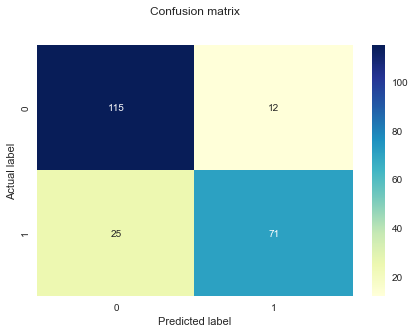

In [75]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_labels, ensemble_results)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Step 3:
Test your models using the data found within the "Holdout_testing" file. Save the results of the final model (remember you will only predict the Survived column in holdout test set with your best model results) in a single, separate CSV titled "Titanic Results from" *insert your name or UChicago net ID.

In [103]:
PassengerId = test.PassengerId
test = test.drop('Name', axis = 1)
test = test.drop('Survived', axis = 1)
test = test.drop('PassengerId', axis = 1)

In [104]:
logreg.fit(train_features, train_labels)
pred1 = logreg.predict(test)

svc.fit(train_features, train_labels)
pred2 = svc.predict(test)

knn.fit(train_features, train_labels)
pred3 = knn.predict(test)

sgd.fit(train_features, train_labels)
pred4 = sgd.predict(test)

decision_tree.fit(train_features, train_labels)
pred5= decision_tree.predict(test)

ada.fit(train_features, train_labels)
pred6 = ada.predict(test)

random_forest.fit(train_features, train_labels)
pred7 = random_forest.predict(test)

ensemble_results = np.round((pred1 + pred2 + pred3 + pred4 + pred5 + pred6 + pred7)/7,0).astype(int)

Submission = pd.DataFrame()
Submission['PassengerId'] = PassengerId
Submission['Survived'] = ensemble_results

Submission.to_csv("Titanic Results from eitrheim.csv", index=False)

### Step 4:
Submit your work: Please submit all of your code for cleaning, prepping, and modeling your data, your "Results" file, a brief write-up comparing the pros and cons of the modeling techniques you used (no more than a paragraph). Your work will be scored on techniques used (appropriateness and complexity), model performance - measured by accuracy precision and F score - on the data hold out, an understanding of the techniques you compared in your write-up, and your overall code.

Running the Polynomial Support Vector Classification and Voting Classifation takes a really long time and the results were not better than random forest. I would sometimes get a higher result (or equal to random forest) when combining all of the the results in an ensemble method so that is what I used for the final model. A downside of that it takes a long time to run to get the results (I ran all the models to get it). Additionally, I can not easily see what columns lead to the decisions, like I can with logistic regression which can be written as a equation and is pretty accurate.